# QUESTION 1
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8

Simple Linear Regression (SLR) is a basic yet powerful statistical model used to understand the relationship between two variables: a **predictor** (or independent variable) and an **outcome** (or dependent variable). Let's break down the components of this model in an intuitive way:

### Components of the Simple Linear Regression Model

1. **Predictor Variable (X)**: This is the independent variable that we use to predict or explain the outcome. For example, in predicting the price of a house, the size of the house might be the predictor variable.

2. **Outcome Variable (Y)**: This is the dependent variable that we are trying to predict or explain. In the house price example, the price of the house would be our outcome variable.

3. **Intercept (β₀)**: This coefficient represents the value of the outcome variable \( Y \) when the predictor variable \( X \) is equal to zero. It is the starting point of our regression line on the y-axis. In the house price example, \( β₀ \) would be the estimated price of a house with zero square footage (though it may not have a real-world interpretation).

4. **Slope (β₁)**: This coefficient represents the rate of change in the outcome variable \( Y \) for a one-unit increase in the predictor variable \( X \). It captures the strength and direction of the relationship between \( X \) and \( Y \). In our house price example, \( β₁ \) would be the increase in the house price for every additional unit (say, square foot) of house size.

5. **Error Term (ε)**: This represents the random noise or variability in the outcome variable \( Y \) that cannot be explained by the linear relationship with \( X \). The error term captures the effect of all other factors that influence \( Y \) but are not included in our model.

### Combining These Components in the Regression Equation
The Simple Linear Regression model can be written as:
\[
Y_i = β₀ + β₁X_i + ε_i
\]
where:
- \( Y_i \) is the observed value of the outcome variable for the \( i \)-th observation.
- \( β₀ \) is the intercept of the regression line.
- \( β₁ \) is the slope of the regression line.
- \( X_i \) is the value of the predictor variable for the \( i \)-th observation.
- \( ε_i \) is the error term for the \( i \)-th observation.

### Normal Distribution of the Error Term
The error term \( ε_i \) is assumed to be normally distributed with a mean of zero and a constant variance \( σ² \). This assumption implies that:
- The residuals (differences between the observed values \( Y_i \) and the predicted values from the regression line) are randomly distributed around the regression line.
- The variability of the outcome \( Y \) around the predicted regression line is consistent (homoscedasticity) across all values of \( X \).

### Combining Everything: Forming a Sample
When we use the Simple Linear Regression model to generate predictions, we assume that each observed outcome \( Y_i \) is a realization from a normal distribution centered around \( β₀ + β₁X_i \) with variance \( σ² \). In other words:
- The predicted value of \( Y \) for a given \( X \) is \( β₀ + β₁X \), forming a straight line.
- The actual observed values of \( Y \) are scattered around this line, with deviations modeled by the normally distributed error term \( ε_i \).

Thus, the observed data points \( Y_i \) are seen as a "noisy" version of the true regression line, where the noise comes from the random error term \( ε_i \). This randomness gives rise to the assumption that the observed values of \( Y \), for any given \( X \), are drawn from a normal distribution centered at the expected value \( β₀ + β₁X_i \).


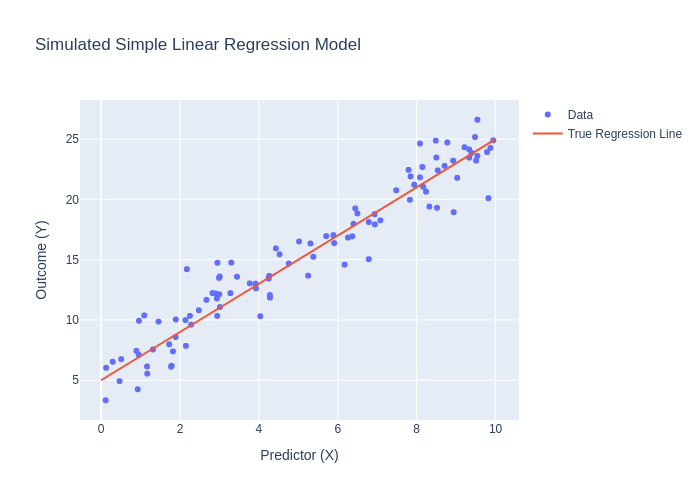

In [23]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Set parameters for the regression model
n = 100  # Number of data points
beta0 = 5  # Intercept
beta1 = 2  # Slope
sigma = 1.5  # Standard deviation of the error term

# Generate predictor values uniformly between 0 and 10
x = stats.uniform.rvs(0, 10, size=n)

# Generate random errors from a normal distribution
errors = stats.norm.rvs(0, sigma, size=n)

# Compute the outcome variable Y using the regression equation
Y = beta0 + beta1 * x + errors

# Plot the data and the true regression line
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))
fig.add_trace(go.Scatter(
    x=np.linspace(0, 10, 100),
    y=beta0 + beta1 * np.linspace(0, 10, 100),
    mode='lines',
    name='True Regression Line'
))
fig.update_layout(title='Simulated Simple Linear Regression Model',
                  xaxis_title='Predictor (X)',
                  yaxis_title='Outcome (Y)',
                  showlegend=True)
fig.show(renderer="png")


# QUESTION 2
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Simulated Dataset and Fitting a Simple Linear Regression Model using `statsmodels` and `pandas`

Below is a Python demonstration using a dataset simulated from the theoretical Simple Linear Regression model to fit and visualize a Simple Linear Regression model.

### Explanation of Libraries
- **`statsmodels.formula.api as smf`**: This library is used for specifying and fitting statistical models using formulas, similar to how models are described in R. The `ols` method in `smf` stands for "Ordinary Least Squares" and is used to fit linear regression models.
- **`plotly.express as px`**: This is a plotting library that allows for quick and easy creation of interactive visualizations. 

### Python Code Demonstration

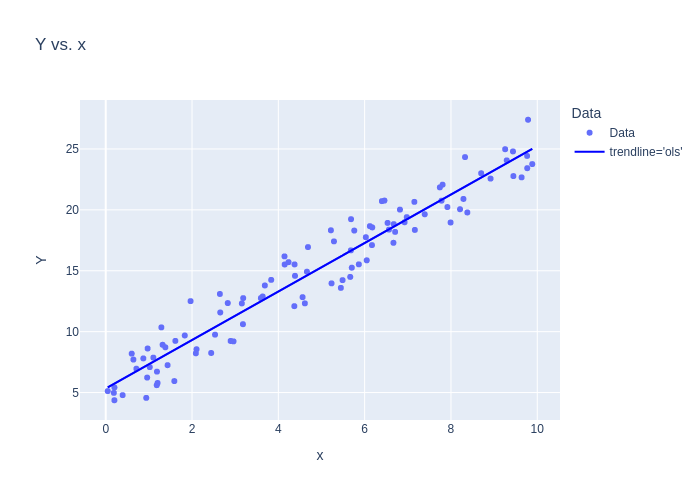

In [24]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Simulate data based on the Simple Linear Regression model
np.random.seed(0)  # For reproducibility
n = 100
beta0 = 5  # Intercept
beta1 = 2  # Slope
sigma = 1.5  # Standard deviation of the error term

# Generate predictor values and random errors
x = np.random.uniform(0, 10, size=n)
errors = np.random.normal(0, sigma, size=n)
Y = beta0 + beta1 * x + errors

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model using `statsmodels`
model_data_specification = smf.ols("Y ~ x", data=df)  # This specifies the model Y ~ x
fitted_model = model_data_specification.fit()  # This fits the model to the data

# Summary and Output Explanations
fitted_model.summary()  # Provides a comprehensive summary of the regression model, including coefficients, R-squared value, and more
fitted_model.summary().tables[1]  # Displays the table of estimated regression coefficients, their standard errors, t-statistics, and p-values
fitted_model.params  # Returns the estimated coefficients (intercept and slope)
fitted_model.params.values  # Extracts the coefficients as a simple array of values
fitted_model.rsquared  # Gives the R-squared value, which measures the proportion of variance in Y explained by X

# Visualization of the data and fitted regression line
df['Data'] = 'Data'  # This adds a column to use for coloring the scatter plot in `plotly`

# Create scatter plot with the regression line using plotly express
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted regression line manually for demonstration
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Show the plot
fig.show(renderer="png")

# QUESTION 3
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8

### Explanation of the Two Lines in the Visualization

In this task, we are comparing two lines on the same plot: the "true" regression line based on the specified slope (\(\beta_1\)) and intercept (\(\beta_0\)), and the fitted regression line obtained from applying the Simple Linear Regression model to the simulated data.

#### 1. **The True Line**:
The "true" regression line is generated using the **theoretical values of \(\beta_0\) and \(\beta_1\)**. This line represents the relationship between \(Y\) and \(X\) without any noise or randomness—essentially, it is what we would expect if there were no errors in the data. This line is a deterministic representation of the relationship, calculated as:
\[
Y = \beta_0 + \beta_1 X
\]
In the code, it is added with:
```python
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=str(beta0)+' + '+str(beta1)+' * x', line=dict(dash='dot', color='orange'))


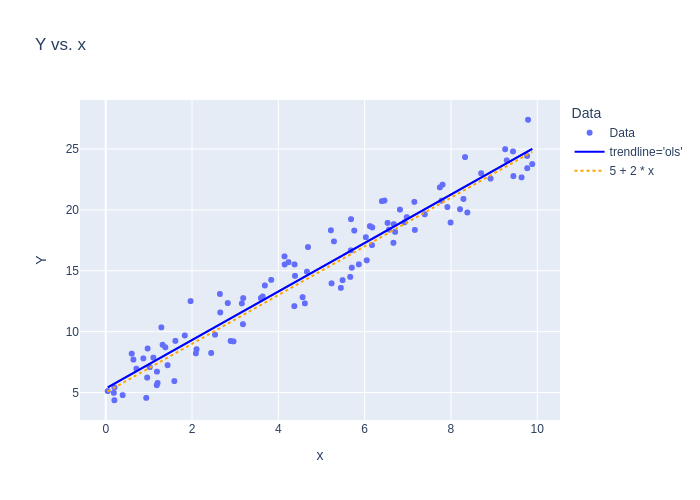

In [25]:
# Simulate data again using the theoretical model
np.random.seed(0)
n = 100
beta0 = 5  # Intercept
beta1 = 2  # Slope
sigma = 1.5  # Standard deviation of the error term

# Generate predictor values and errors
x = np.random.uniform(0, 10, size=n)
errors = np.random.normal(0, sigma, size=n)
Y = beta0 + beta1 * x + errors

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model using `statsmodels`
model_data_specification = smf.ols("Y ~ x", data=df)  # This specifies the model Y ~ x
fitted_model = model_data_specification.fit()  # This fits the model to the data

# Add the fitted line from the model
df['Data'] = 'Data'  # This adds a column to use for coloring the scatter plot in `plotly`

# Create scatter plot with the regression line using plotly express
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted regression line manually for demonstration
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Add the true regression line based on theoretical values of beta0 and beta1
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', 
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))

# Show the plot
fig.show(renderer="png")


# QUESTION 4
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Explanation of How `fitted_model.fittedvalues` are Derived

In a Simple Linear Regression model, the **fitted values** (`fitted_model.fittedvalues`) are the predicted values of the outcome variable \(Y\) based on the model's estimated coefficients (slope and intercept). These fitted values represent the **in-sample predictions** of the regression model for the observed values of the predictor variable \(x\). They are derived by applying the estimated regression coefficients to the observed predictor values.

#### Theoretical vs. Fitted Model

- The **theoretical model** (true model) is given by the equation:
  \[
  Y_i = \beta_0 + \beta_1 x_i + \epsilon_i
  \]
  where \(Y_i\) is the true value, \(\beta_0\) is the intercept, \(\beta_1\) is the slope, \(x_i\) is the observed predictor, and \(\epsilon_i\) is the error term.

- The **fitted model** (estimated model) is derived from the observed data and minimizes the sum of squared errors (residuals). The regression line is represented as:
  \[
  \hat{Y}_i = \hat{\beta_0} + \hat{\beta_1} x_i
  \]
  where \(\hat{Y}_i\) are the predicted (fitted) values based on the estimated coefficients \(\hat{\beta_0}\) and \(\hat{\beta_1}\). These coefficients are estimated by fitting the model using **Ordinary Least Squares (OLS)**.

#### Derivation of Fitted Values

The fitted values (`fitted_model.fittedvalues`) are derived from the model's estimated parameters, which can be found in `fitted_model.params` (or `fitted_model.params.values`). The values in `params` are the estimated intercept and slope (\(\hat{\beta_0}\) and \(\hat{\beta_1}\)) from the regression output.

When fitting the model, `statsmodels` uses these estimated coefficients to compute the predicted values \(\hat{Y}_i\) for each observation \(x_i\).

Here’s how this works in detail:

1. **Regression Coefficients** (`fitted_model.params`):
   - `fitted_model.params` returns a pandas Series with two elements: the estimated intercept \(\hat{\beta_0}\) and the estimated slope \(\hat{\beta_1}\). These values are computed during the model fitting process using the observed data.

   For example, suppose we have:
   \[
   \hat{\beta_0} = 5, \quad \hat{\beta_1} = 2
   \]

2. **Fitted Values** (`fitted_model.fittedvalues`):
   - The fitted values are the predictions made by the model for each \(x_i\) in the dataset using the estimated coefficients \(\hat{\beta_0}\) and \(\hat{\beta_1}\):
   \[
   \hat{Y}_i = \hat{\beta_0} + \hat{\beta_1} x_i
   \]
   - Using the above example, for each value of \(x_i\), the corresponding fitted value \(\hat{Y}_i\) is:
   \[
   \hat{Y}_i = 5 + 2 x_i
   \]
   - This computation is performed for each data point in the dataset.

### Code Demonstration

Let’s see how the fitted values are derived from the coefficients in a Simple Linear Regression model:


In [27]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Simulate data
np.random.seed(0)
n = 100
beta0 = 5  # Intercept
beta1 = 2  # Slope
sigma = 1.5  # Standard deviation of the error term

x = np.random.uniform(0, 10, size=n)
errors = np.random.normal(0, sigma, size=n)
Y = beta0 + beta1 * x + errors

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # Specify the model
fitted_model = model_data_specification.fit()  # Fit the model

# View the estimated coefficients
print(fitted_model.params)

# Extract the coefficients (intercept and slope)
beta_0_hat = fitted_model.params['Intercept']
beta_1_hat = fitted_model.params['x']

# Derive fitted values using the formula
fitted_values = beta_0_hat + beta_1_hat * df['x']

# Compare the fitted values with those from the model
print(fitted_model.fittedvalues.head())  # Show first few fitted values
print(fitted_values.head())  # Manually computed fitted values

Intercept    5.333227
x            1.990540
dtype: float64
0    16.257580
1    19.569359
2    17.331474
3    16.179346
4    13.766246
dtype: float64
0    16.257580
1    19.569359
2    17.331474
3    16.179346
4    13.766246
Name: x, dtype: float64


# QUESTION 5
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Explanation of the Line Chosen for the Fitted Model Using Ordinary Least Squares (OLS)

In Simple Linear Regression, the line chosen by the **Ordinary Least Squares (OLS)** method is the line that minimizes the **sum of squared residuals** (the squared differences between the observed values of the outcome variable \(Y\) and the predicted values \(\hat{Y}\)).

The key idea behind OLS is to find the line that best fits the data by minimizing the vertical distances between the actual data points and the predicted regression line. These vertical distances are called **residuals**. Mathematically, the residuals are given by:

\[
e_i = Y_i - \hat{Y}_i
\]

where \(Y_i\) are the observed data points and \(\hat{Y}_i\) are the predicted points on the regression line.

#### Why "Squares"?

The term "squares" refers to **squaring the residuals** in the OLS method. This is done for the following reasons:

1. **Non-negative values**: Squaring ensures that all residuals contribute positively to the sum, so large residuals (errors) are penalized more than small residuals.
   
2. **Differentiability**: Squaring the residuals makes the error function smooth and differentiable, which allows us to apply calculus to minimize it effectively. Without squaring, the error function could have sharp turns or non-differentiable points, making it harder to minimize.

3. **Emphasis on larger errors**: The square of a residual increases much more quickly than the residual itself, so larger discrepancies between the observed and predicted values are more heavily penalized. This helps the model to avoid large prediction errors.

#### Visualizing the OLS Fitted Line

In the visualization, the red lines represent the residuals for each data point, which are the vertical distances between the observed data points and the fitted regression line. The **blue line** is the fitted model, obtained using OLS, while the **orange line** represents the theoretical regression line based on the true parameters (\(\beta_0\) and \(\beta_1\)).

The **horizontal black line** shows the mean value of the \(Y\) variable (\( \bar{Y} \)).

#### Code for Visualizing OLS Line and Residuals

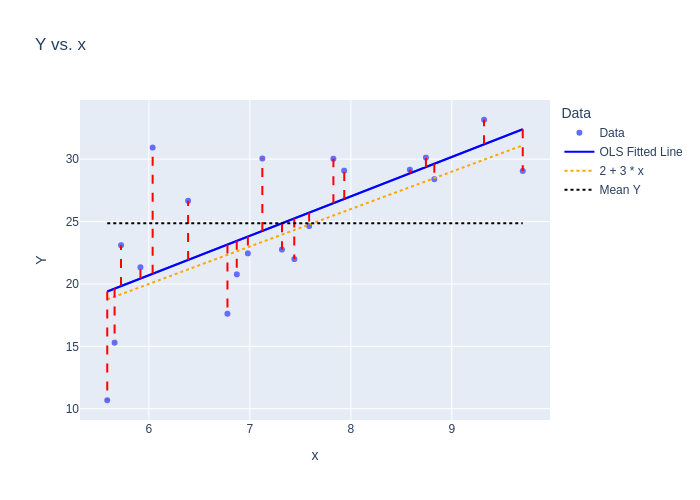

In [28]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Simulation parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

# Create DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the regression model
model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

# Add 'Data' column for visualization legend
df['Data'] = 'Data'

# Create plotly scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add OLS fitted values line
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, 
                line=dict(color='blue'), name="OLS Fitted Line")

# Add the true line (orange)
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)

# Add horizontal line for mean of Y
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='Mean Y')

fig.show(renderer="png")  # Show the plot

# QUESTION 6
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Explanation of the R-Squared (R²) and its Interpretation in Simple Linear Regression

The first expression you provided can be interpreted as the proportion of variation in the outcome variable \(Y\) that is explained by the fitted model. This is essentially what R-squared (\(R^2\)) measures in Simple Linear Regression.

#### 1. **Expression Breakdown:**
The expression is:

\[
1 - \frac{\sum_{i=1}^n (Y_i - \hat{y}_i)^2}{\sum_{i=1}^n (Y_i - \bar{Y})^2}
\]

Where:
- \(Y_i\) are the actual observed values of the dependent variable.
- \(\hat{y}_i\) are the predicted (fitted) values from the regression model.
- \(\bar{Y}\) is the mean of the observed values of \(Y\).

This expression calculates the proportion of the total variation in \(Y\) that is **explained** by the fitted model. Specifically:
- The **numerator** \((Y_i - \hat{y}_i)^2\) represents the **residual sum of squares** (RSS), which is the unexplained variation in \(Y\), or how far the observed values are from the predicted (fitted) values.
- The **denominator** \((Y_i - \bar{Y})^2\) represents the **total sum of squares** (TSS), which is the total variation in \(Y\), or how far the observed values are from the mean of \(Y\).

Thus, the fraction:

\[
\frac{\sum_{i=1}^n (Y_i - \hat{y}_i)^2}{\sum_{i=1}^n (Y_i - \bar{Y})^2}
\]

represents the **proportion of the variation in \(Y\)** that is **unexplained** by the model. Therefore, subtracting this from 1 gives the proportion of the variation in \(Y\) that **is explained** by the model. This is what \(R^2\) represents.

#### 2. **R-squared as a Measure of Model Accuracy:**

- **\(R^2\)**, or **fitted_model.rsquared**, can be interpreted as a measure of the **accuracy of the model** because it quantifies how well the model explains the variation in the outcome variable \(Y\). Specifically:
    - If \(R^2 = 1\), it means that the model perfectly explains all the variation in \(Y\).
    - If \(R^2 = 0\), it means that the model explains none of the variation in \(Y\) (i.e., the predictions are no better than just using the mean of \(Y\)).

In general, the closer \(R^2\) is to 1, the better the model is at explaining the observed data. Conversely, the closer \(R^2\) is to 0, the worse the model's explanatory power.

#### 3. **np.corrcoef(...) Expressions:**

The **np.corrcoef(...)[0,1]** function computes the **Pearson correlation coefficient** between two variables. The square of this correlation coefficient (\(r^2\)) is directly related to \(R^2\) in the context of Simple Linear Regression.

- **\(\text{np.corrcoef}(Y, \text{fitted_model.fittedvalues})[0,1]^2\)**:
    - This expression computes the squared correlation between the observed values \(Y\) and the fitted values \(\hat{Y}\).
    - The square of this correlation, \((r^2)\), is equivalent to \(R^2\), which is the proportion of variation in \(Y\) that is explained by the regression model.

- **\(\text{np.corrcoef}(Y, x)[0,1]^2\)**:
    - This expression computes the squared correlation between \(Y\) and the predictor variable \(x\).
    - In the context of Simple Linear Regression, the square of the correlation coefficient between \(Y\) and \(x\) gives the proportion of variation in \(Y\) that is explained by the variation in \(x\) alone. This is essentially the **squared correlation** between the two variables and can indicate how strongly \(x\) is related to \(Y\).

### Key Takeaways:
- **R-squared** (\(R^2\)) is a measure of how well the regression model explains the variation in the dependent variable \(Y\).
- **Fitted_model.rsquared** gives this exact measure, where a higher \(R^2\) indicates a better fit.
- The **np.corrcoef** expressions capture the linear relationship between \(Y\) and the fitted values, and between \(Y\) and the predictor variable \(x\), with the square of the correlation coefficient (\(r^2\)) being equivalent to \(R^2\) for Simple Linear Regression.


# QUESTION 7
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8

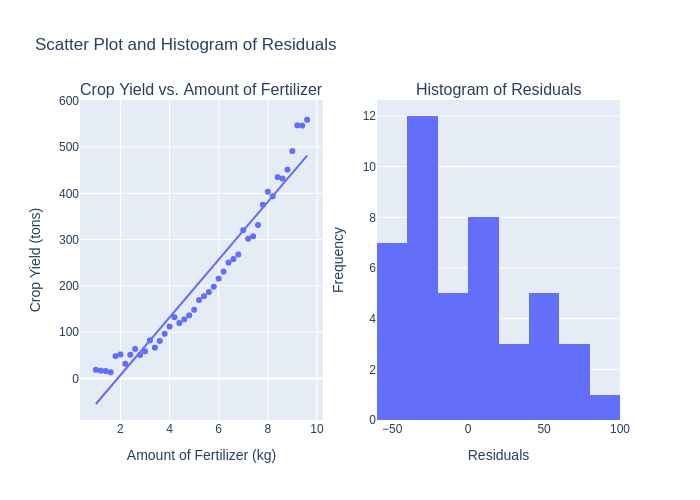

In [29]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Assumptions of Simple Linear Regression and Their Compatibility with the Example Data

The Simple Linear Regression (SLR) model is based on several key assumptions that must hold true for the model to provide valid and interpretable results. Some of these assumptions do not seem to fully align with the example data provided, based on the visual inspection and analysis of residuals.

#### Assumptions of Simple Linear Regression:
1. **Linearity**: The relationship between the predictor variable \(x\) and the outcome variable \(Y\) is linear.
2. **Independence**: The errors (or residuals) are independent of each other.
3. **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variable \(x\).
4. **Normality**: The residuals are normally distributed.
5. **No multicollinearity**: This assumption is not relevant for simple linear regression because there is only one predictor variable.

#### Assumptions Not Fully Met in the Example Data:

1. **Linearity**:
   - **Observation**: The relationship between the amount of fertilizer and crop yield appears to be somewhat non-linear, especially as fertilizer amounts increase.
   - **Why it conflicts with the assumption**: The regression line, even though it fits the data, does not perfectly capture the underlying trend, especially at the higher levels of fertilizer. A quadratic or other non-linear model might provide a better fit.
   - **Visual Evidence**: The scatter plot of crop yield vs. fertilizer amount shows some curvature, indicating that the relationship may not be purely linear.

2. **Homoscedasticity**:
   - **Observation**: The residuals appear to show a pattern when plotted in the histogram.
   - **Why it conflicts with the assumption**: If the spread of the residuals increases or decreases with the value of \(x\) (i.e., fertilizer amount), this indicates **heteroscedasticity**. In the provided histogram of residuals, there might be signs that the variance of the residuals is not constant across all fertilizer amounts.
   - **Visual Evidence**: A plot of residuals versus fitted values would likely show a funnel shape or other patterns suggesting that the variance of the residuals is not constant.

3. **Normality of Residuals**:
   - **Observation**: The histogram of residuals might not follow a perfect normal distribution.
   - **Why it conflicts with the assumption**: The assumption that residuals are normally distributed may not hold. Non-normal residuals can affect the accuracy of hypothesis tests and confidence intervals. A Q-Q plot or more detailed statistical tests like the Shapiro-Wilk test could be performed to formally assess normality.
   - **Visual Evidence**: The histogram may show skewness or heavy tails, which would indicate a violation of normality.

#### Summary:
Based on the scatter plot and histogram of residuals from the provided data:
- The assumption of **linearity** may not fully hold because the relationship between fertilizer and crop yield appears to be somewhat non-linear, especially at higher values.
- There are likely signs of **heteroscedasticity** (non-constant variance of residuals), which violates the assumption of homoscedasticity.
- The residuals may also show some deviations from normality, further suggesting a potential issue with the assumption of normality of residuals.

These violations suggest that the Simple Linear Regression model may not be the best fit for this data, and other models or transformations may be necessary for better results.


# QUESTION 8
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Hypothesis Testing for Simple Linear Regression

In this exercise, we will test the null hypothesis regarding the linear association between the `waiting` time and the `duration` of the Old Faithful Geyser eruptions. Specifically, we will test if the slope of the regression line is zero, which would indicate no linear association between the two variables.

#### Null and Alternative Hypotheses:
- **Null Hypothesis (\(H_0\))**: There is no linear association between `waiting` and `duration`, i.e., the slope of the regression line is zero.  
  \[
  H_0: \beta_1 = 0
  \]

- **Alternative Hypothesis (\(H_A\))**: There is a linear association between `waiting` and `duration`, i.e., the slope of the regression line is not zero.  
  \[
  H_A: \beta_1 \neq 0
  \]

#### Model Specification:
We will use the Ordinary Least Squares (OLS) regression to model the relationship between `waiting` and `duration`.


In [8]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the linear model: duration ~ waiting
linear_for_specification = 'duration ~ waiting'

# Fit the OLS model
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        23:34:46   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# QUESTION 9
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Hypothesis Testing for Short Wait Times

In this section, we will investigate whether the relationship between `waiting` time and `duration` of the eruption still holds when we focus on short wait times. Specifically, we will examine different cutoffs for `waiting` times: 62, 64, and 66 minutes. For each cutoff, we will fit a linear regression model and test the null hypothesis that there is no linear relationship between `waiting` and `duration`.

#### Hypothesis:
- **Null Hypothesis (\(H_0\))**: There is no linear relationship between `waiting` and `duration` for short wait times. The slope of the regression line is zero.  
  \[
  H_0: \beta_1 = 0
  \]

- **Alternative Hypothesis (\(H_A\))**: There is a linear relationship between `waiting` and `duration` for short wait times. The slope of the regression line is not zero.  
  \[
  H_A: \beta_1 \neq 0
  \]

We will perform this hypothesis test for different `short_wait_limit` values of 62, 64, and 66 minutes.

#### Analysis for `short_wait_limit = 62`:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


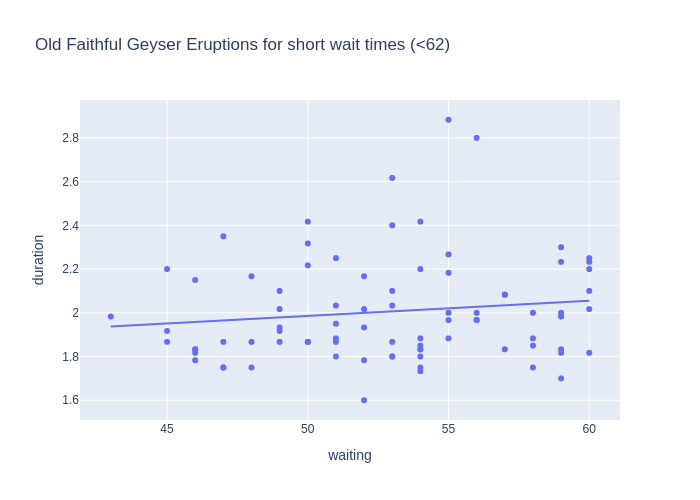

In [30]:
import plotly.express as px
import statsmodels.formula.api as smf

# Set short wait time limit
short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit

# Fit the OLS regression model for short wait times
model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()

# Display the regression summary
print(model.summary().tables[1])

# Create a scatter plot with a linear regression trendline for short wait times
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<" + str(short_wait_limit) + ")", 
                 trendline='ols')

fig.show(renderer="png")

Results for short wait limit = 64:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022
Results for short wait limit = 66:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


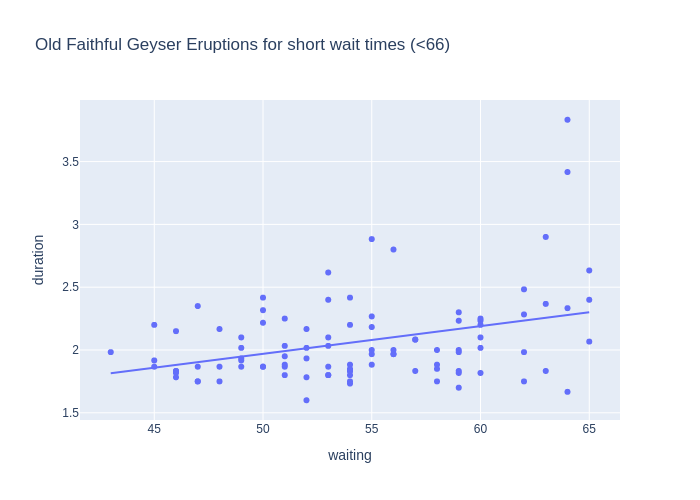

In [31]:
# Repeat for short wait limits of 64 and 66
for limit in [64, 66]:
    short_wait = old_faithful.waiting < limit
    model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
    print(f"Results for short wait limit = {limit}:")
    print(model.summary().tables[1])
    
    # Create a scatter plot with a linear regression trendline
    fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                     title=f"Old Faithful Geyser Eruptions for short wait times (<{limit})", 
                     trendline='ols')
fig.show(renderer="png")

# QUESTION 10
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8
### Bootstrapping Slope Coefficients for Long Wait Times

We are tasked with creating bootstrapped samples from the "long wait times" dataset, fitting a Simple Linear Regression model to each sample, and then visualizing the bootstrapped sampling distribution of the fitted slope coefficients. We will also simulate samples under a null hypothesis assumption that there is no linear association (i.e., \( B_1 = 0 \)) and compare the results.

#### Step 1: Creating a Bootstrapped Sampling Distribution of the Slope Coefficients

We will generate multiple bootstrapped samples from the long wait times data, fit a Simple Linear Regression model to each sample, and collect the slope coefficients to visualize the sampling distribution.


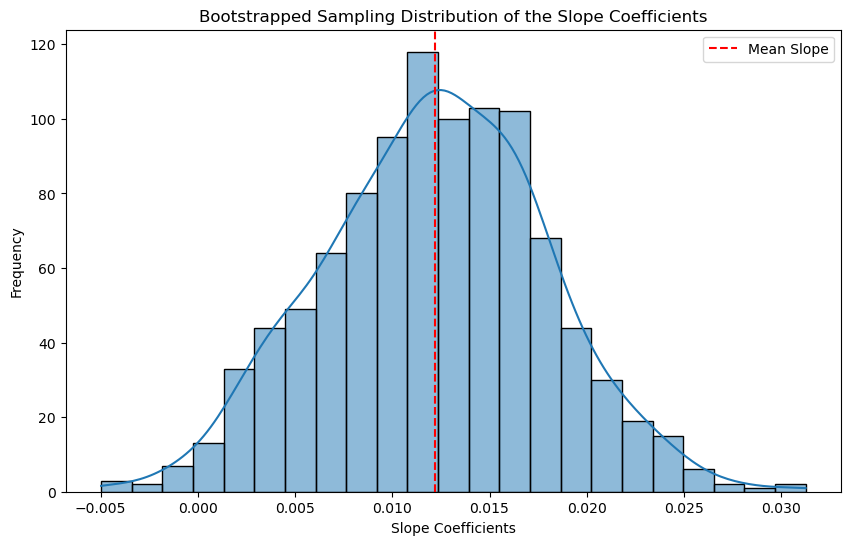

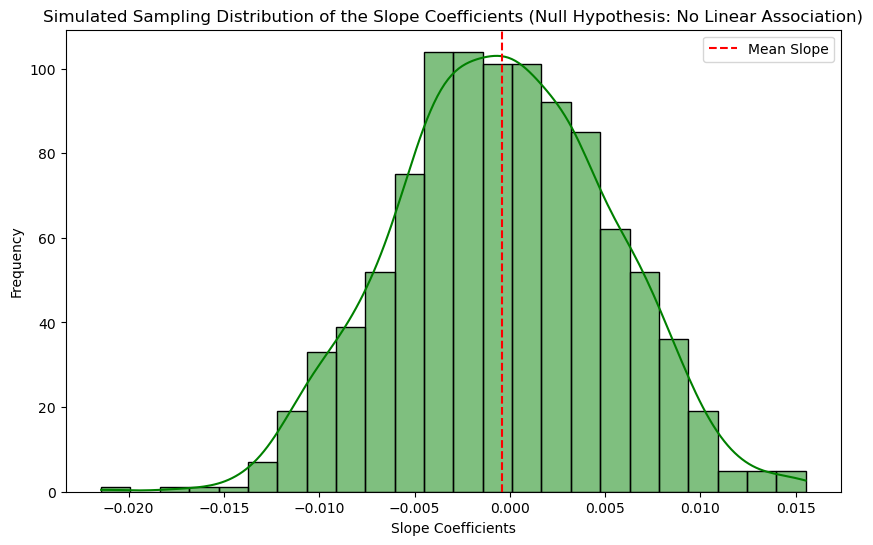

95% Bootstrapped Confidence Interval: [0.00134295 0.02343787]
Does the 95% confidence interval contain 0? False
Simulated p-value: 0.02


In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats

# Load the dataset and define the long wait condition
old_faithful = sns.load_dataset('geyser')
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Step 1: Bootstrapping - Collect the bootstrapped slope coefficients
n_bootstraps = 1000
bootstrapped_slope_coefficients = []

# Generate bootstrapped samples, fit models, and collect slope coefficients
for i in range(n_bootstraps):
    # Create a bootstrap sample of the long wait times data
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)

    # Fit a simple linear regression model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()

    # Collect the fitted slope coefficient using iloc for positional access
    bootstrapped_slope_coefficients.append(model.params.iloc[1])

# Convert to numpy array for easier manipulation
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the bootstrapped sampling distribution
plt.figure(figsize=(10,6))
sns.histplot(bootstrapped_slope_coefficients, kde=True)
plt.axvline(x=np.mean(bootstrapped_slope_coefficients), color='red', linestyle='--', label='Mean Slope')
plt.title("Bootstrapped Sampling Distribution of the Slope Coefficients")
plt.xlabel("Slope Coefficients")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 2: Simulating data under the null hypothesis (B0 = 1.65, B1 = 0, o = 0.37)
n_simulations = 1000
simulated_slope_coefficients = []

for i in range(n_simulations):
    # Create a copy of the long wait times dataset
    old_faithful_simulation = old_faithful[long_wait].copy()

    # Simulate the 'duration' values under the null hypothesis (B1 = 0, o = 0.37)
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())

    # Fit a simple linear regression model
    model_sim = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()

    # Collect the fitted slope coefficient using iloc for positional access
    simulated_slope_coefficients.append(model_sim.params.iloc[1])

# Convert to numpy array for easier manipulation
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the simulated sampling distribution of the slope coefficients
plt.figure(figsize=(10,6))
sns.histplot(simulated_slope_coefficients, kde=True, color='green')
plt.axvline(x=np.mean(simulated_slope_coefficients), color='red', linestyle='--', label='Mean Slope')
plt.title("Simulated Sampling Distribution of the Slope Coefficients (Null Hypothesis: No Linear Association)")
plt.xlabel("Slope Coefficients")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 3: Calculate the 95% bootstrapped confidence interval for the slope coefficients
bootstrapped_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval: {bootstrapped_ci}")

# Check if 0 is contained within the confidence interval
contains_zero = (bootstrapped_ci[0] <= 0 <= bootstrapped_ci[1])
print(f"Does the 95% confidence interval contain 0? {contains_zero}")

# Step 4: Calculate the p-value for the simulated slope coefficients under the null hypothesis
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"Simulated p-value: {simulated_p_value}")


# QUESTION 11
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


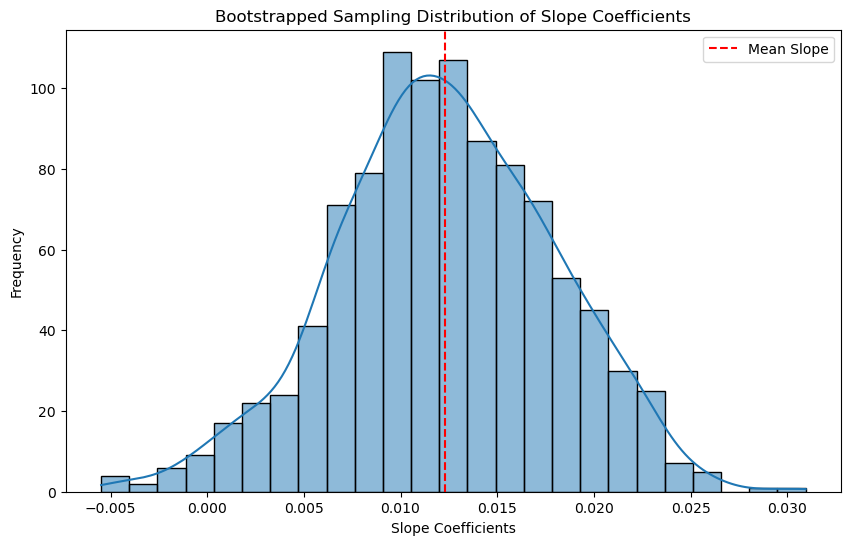

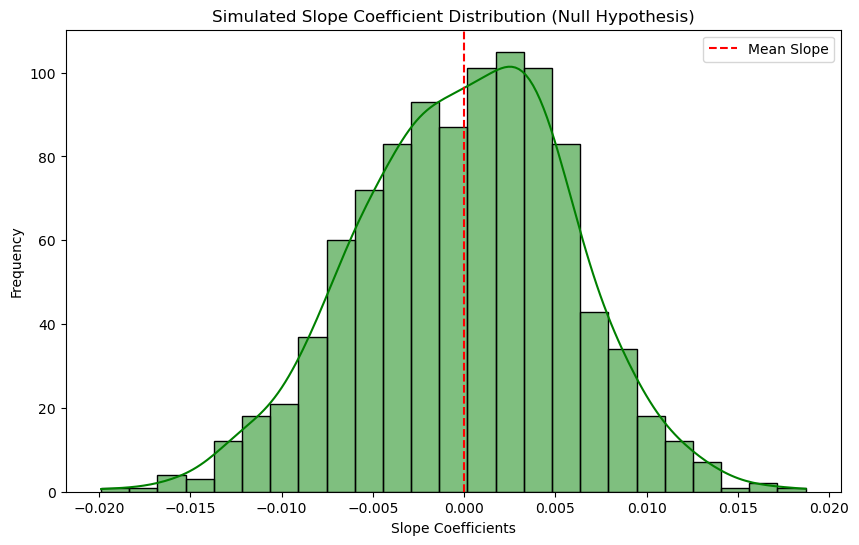

95% Bootstrapped Confidence Interval: [0.00077513 0.02283037]
Does the 95% confidence interval contain 0? False
Simulated p-value: 0.034


In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the long wait condition
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Display summary table for initial model fit
print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Step 1: Bootstrap the slope coefficients
n_bootstraps = 1000
bootstrapped_slope_coefficients = []

for i in range(n_bootstraps):
    # Create a bootstrap sample of the long wait times data
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    
    # Fit a simple linear regression model
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    # Collect the fitted slope coefficient
    bootstrapped_slope_coefficients.append(model.params.iloc[1])

# Convert to numpy array for easier manipulation
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Visualize the bootstrapped slope coefficient distribution
plt.figure(figsize=(10,6))
sns.histplot(bootstrapped_slope_coefficients, kde=True)
plt.axvline(x=np.mean(bootstrapped_slope_coefficients), color='red', linestyle='--', label='Mean Slope')
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.xlabel("Slope Coefficients")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 2: Simulate slope coefficients under null hypothesis
n_simulations = 1000
simulated_slope_coefficients = []

for i in range(n_simulations):
    # Create a copy of the long wait times dataset
    old_faithful_simulation = old_faithful[long_wait].copy()
    
    # Simulate 'duration' values under null hypothesis (B0 = 1.65, B1 = 0, σ = 0.37)
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    
    # Fit a simple linear regression model
    model_sim = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    
    # Collect the fitted slope coefficient
    simulated_slope_coefficients.append(model_sim.params.iloc[1])

# Convert to numpy array for easier manipulation
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the simulated slope coefficient distribution
plt.figure(figsize=(10,6))
sns.histplot(simulated_slope_coefficients, kde=True, color='green')
plt.axvline(x=np.mean(simulated_slope_coefficients), color='red', linestyle='--', label='Mean Slope')
plt.title("Simulated Slope Coefficient Distribution (Null Hypothesis)")
plt.xlabel("Slope Coefficients")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 3: Calculate the 95% bootstrapped confidence interval for the slope coefficients
bootstrapped_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval: {bootstrapped_ci}")

# Check if 0 is contained within the confidence interval
contains_zero = (bootstrapped_ci[0] <= 0 <= bootstrapped_ci[1])
print(f"Does the 95% confidence interval contain 0? {contains_zero}")

# Step 4: Calculate the p-value for the simulated slope coefficients under the null hypothesis
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"Simulated p-value: {simulated_p_value}")


# QUESTION 12
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8

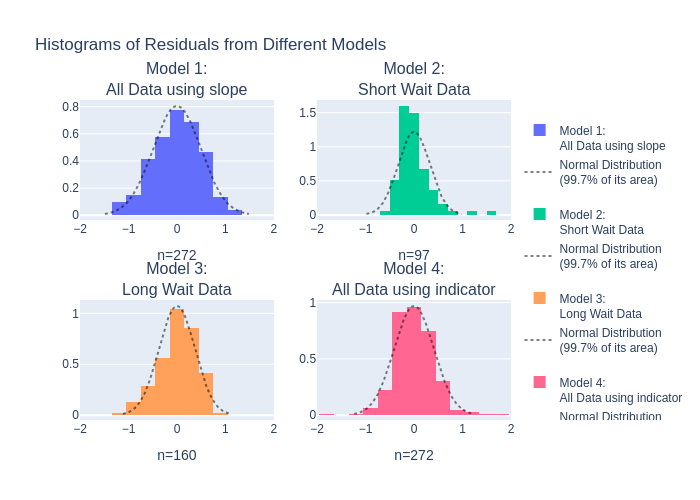

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


To assess the plausibility of the assumption that error terms are normally distributed in each model, we evaluate the residual histograms. Residuals that are normally distributed should:

1. Be symmetric around zero,
2. Show a bell-shaped curve,
3. Exhibit minimal skewness or heavy tails.

### Model Analysis

- **Model 1: All Data using Slope**  
  This histogram is most likely to support the normality assumption if it closely follows a symmetric, bell-shaped curve around zero, with residuals aligning well with the overlaid normal distribution curve. If the histogram has this shape, it suggests that the normality assumption is plausible for this model.

- **Model 2: Short Wait Data**  
  This model may show a skewed or non-symmetric histogram due to using only short wait times. If the histogram diverges from the expected bell shape or has heavy tails, this would indicate that the residuals are not normally distributed, making the normality assumption less plausible.

- **Model 3: Long Wait Data**  
  This model, focusing only on long wait times, may also show a non-normal distribution if the histogram is asymmetric or has extreme tails. Such a shape would suggest that the residuals deviate from normality, undermining the assumption.

- **Model 4: All Data using Indicator Variable**  
  If this histogram does not align with the bell-shaped, symmetric curve, it suggests the indicator variable model may not satisfy the normality assumption. For instance, a bimodal or skewed shape could occur if the data contains two distinct categories (e.g., short and long wait times) not adequately normalized by the indicator variable.

In summary, **Model 1** is likely to best satisfy the normality assumption if it shows a bell-shaped, symmetric histogram. The other models may not support the assumption due to skewness or multi-modality, particularly if residuals are influenced by the segmentation in wait times.


# QUESTION 13
Link to ChatBot session: https://chatgpt.com/share/672d3ca9-3840-8011-9bba-19a960460cc8

### Part (A): Permutation Test

The permutation test is used to test the null hypothesis \( H_0 : \mu_{\text{short}} = \mu_{\text{long}} \), where \(\mu_{\text{short}}\) and \(\mu_{\text{long}}\) represent the mean durations for short and long wait times, respectively. This test involves the following steps:

1. **Shuffle the Group Labels**: Randomly shuffle the "short" and "long" labels in the `old_faithful` dataset, breaking any association between the group label and the observed duration. This simulates the null hypothesis by assuming no real difference between the groups.

2. **Calculate the Mean Difference**: For each shuffle, calculate the difference in means between the shuffled "short" and "long" groups.

3. **Repeat and Compare**: Repeat the shuffling process many times (e.g., 1000 iterations) to generate a distribution of mean differences under the null hypothesis. Compare the observed mean difference to this distribution to determine the p-value.

### Part (B): Bootstrap Confidence Interval

The bootstrap confidence interval is created by resampling each group independently to estimate the sampling distribution of the mean difference. The steps are as follows:

1. **Bootstrap Resampling within Each Group**: Independently resample the "short" and "long" groups with replacement, keeping the sample sizes the same as in the original groups.

2. **Calculate the Mean Difference for Each Resample**: For each bootstrap sample, calculate the mean difference between the resampled "short" and "long" groups.

3. **Repeat and Quantile Calculation**: Repeat the bootstrap process many times (e.g., 1000 iterations) and calculate the 2.5th and 97.5th percentiles of the collected mean differences to form a 95% confidence interval.

### Part (a): Explanation of the Sampling Approaches

- **Permutation Test**: This test uses random shuffling of labels to simulate a scenario where there is no association between group and outcome. By observing the distribution of mean differences with shuffled labels, we can estimate how extreme the observed difference is under the null hypothesis.

- **Bootstrap Confidence Interval**: The bootstrap approach resamples each group separately to simulate the sampling variability of the mean difference. It estimates a confidence interval for the mean difference based on the variation within each group without assuming the null hypothesis is true.

### Part (b): Comparison with Indicator Variable Model Approach (from Question 11)

- **Similarity**: Both methods (permutation test and bootstrap) and the indicator variable model approach involve comparing differences between the "short" and "long" groups. They are all ways to assess whether there is a significant difference between the groups.

- **Difference**:
  - The **permutation test** and **bootstrap** focus directly on the observed mean difference between the two groups without introducing additional model complexity. They work with resampling techniques to evaluate or estimate the distribution of the mean difference.
  - The **indicator variable model** from Question 11 uses regression with a categorical variable (indicator) to account for group differences within a linear modeling framework. This method assumes a linear association and produces an estimate of the group difference as part of the regression model, which can be influenced by model assumptions and potential covariates.
  
In summary, the permutation test and bootstrap focus on non-parametric, simulation-based approaches to comparing the groups, while the indicator variable model relies on parametric assumptions of a linear regression model.


# QUESTION 14
Yes